# Import Statements

In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as L
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Attribute Information
</br> 1) id: unique identifier
</br> 2) gender: "Male", "Female" or "Other"
</br> 3) age: age of the patient
</br> 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
</br> 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
</br> 6) ever_married: "No" or "Yes"
</br> 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
</br> 8) Residence_type: "Rural" or "Urban"
</br> 9) avg_glucose_level: average glucose level in blood
</br> 10) bmi: body mass index
</br> 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
</br> 12) stroke: 1 if the patient had a stroke or 0 if not
</br> *Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/healthcare-dataset-stroke-data.csv')

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Correlation Table

In [ ]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


# Checking the class count

In [ ]:
df.count()

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

# Describing the dataset

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Data Visualizations (Graphs)

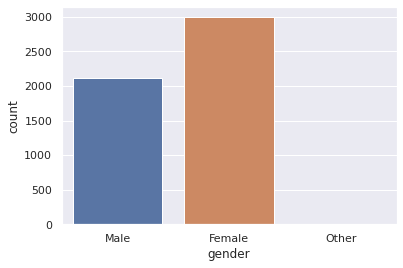

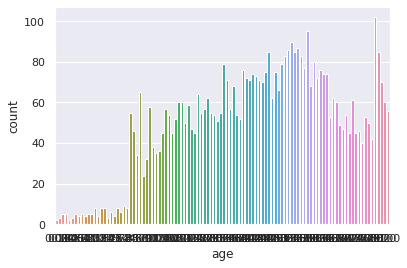

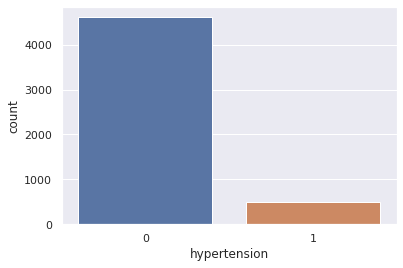

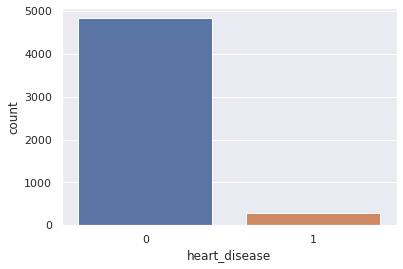

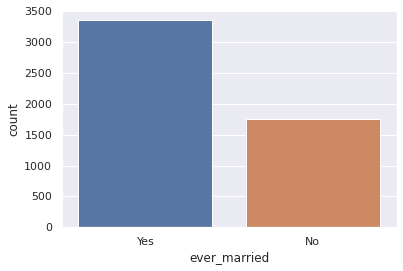

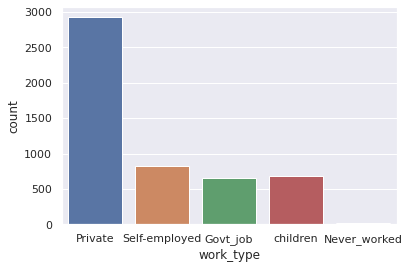

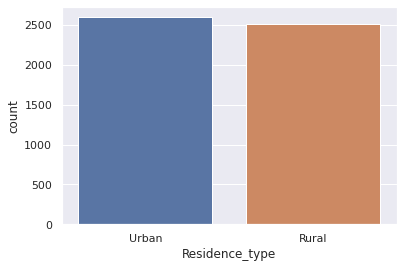

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


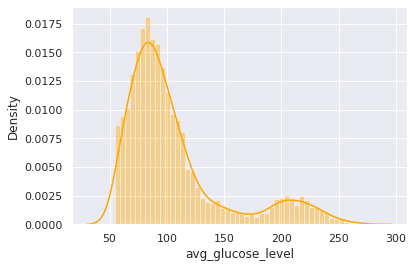

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


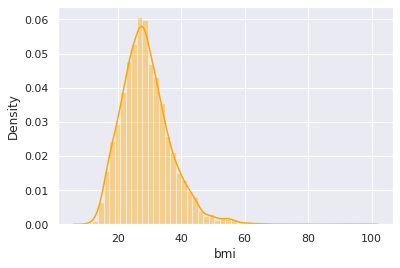

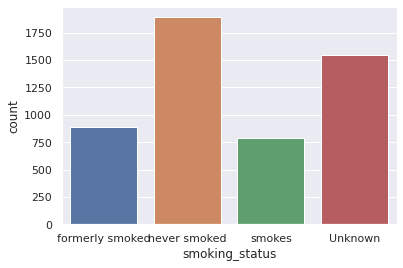

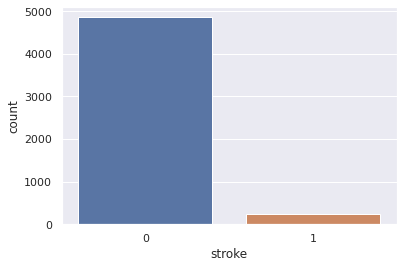

In [ ]:
sns.set_theme(style = "darkgrid")
sns.countplot(data = df, x = "gender")
plt.show()

sns.set_theme(style = "darkgrid")
sns.countplot(data = df, x = "age")
plt.show()

sns.set_theme(style = "darkgrid")
sns.countplot(data = df, x = "hypertension")
plt.show()

sns.set_theme(style = "darkgrid")
sns.countplot(data = df, x = "heart_disease")
plt.show()

sns.set_theme(style = "darkgrid")
sns.countplot(data = df, x = "ever_married")
plt.show()

sns.set_theme(style = "darkgrid")
sns.countplot(data = df, x = "work_type")
plt.show()
         
sns.set_theme(style = "darkgrid")
sns.countplot(data = df, x = "Residence_type")
plt.show()

sns.set_theme(style = "darkgrid")
sns.distplot(df.avg_glucose_level, color="orange", label="avg_glucose_level", kde = True)
plt.show()
         
sns.set_theme(style = "darkgrid")
sns.distplot(df.bmi, color="orange", label="bmi", kde = True)
plt.show()
     
sns.set_theme(style = "darkgrid")
sns.countplot(data = df, x = "smoking_status")
plt.show()
    
sns.set_theme(style = "darkgrid")
sns.countplot(data = df, x = "stroke")
plt.show()

# Dealing with missing labels

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# We will use a Decision Tree to predict the missing BMI

dt_bmi_pipeline = Pipeline(steps=[('scale', StandardScaler()), ('lr', DecisionTreeRegressor(random_state = 0))])

X = df[['age','gender','bmi']].copy()
X.gender = X.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)

missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
dt_bmi_pipeline.fit(X, Y)
predicted_bmi = pd.Series(dt_bmi_pipeline.predict(missing[['age','gender']]),index = missing.index)
df.loc[missing.index,'bmi'] = predicted_bmi

In [ ]:
print('Verifying the dataframe')
df.isnull().sum()

Verifying the dataframe


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df["Residence_type"] = df["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
df["gender"] = df["gender"].apply(lambda x: 1 if x=="Male" else 0)

df['work_type'] = df['work_type'].replace({'Govt_job':1,'Never_worked':2,'Private':3,'Self-employed':4,'children':5}).astype(np.uint8)
df['smoking_status'] = df['smoking_status'].replace({'Unknown':1,'formerly smoked':2,'never smoked':3,'smokes':4}).astype(np.uint8)

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,3,1,228.69,36.600000,2,1
1,51676,0,61.0,0,0,1,4,0,202.21,29.879487,3,1
2,31112,1,80.0,0,1,1,3,0,105.92,32.500000,3,1
3,60182,0,49.0,0,0,1,3,1,171.23,34.400000,4,1
4,1665,0,79.0,1,0,1,4,0,174.12,24.000000,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,3,1,83.75,28.476923,3,0
5106,44873,0,81.0,0,0,1,4,1,125.20,40.000000,3,0
5107,19723,0,35.0,0,0,1,4,0,82.99,30.600000,3,0
5108,37544,1,51.0,0,0,1,3,0,166.29,25.600000,2,0


In [ ]:
scaling = False

if scaling:
    std = StandardScaler()
    columns = ['avg_glucose_level','bmi','age']
    scaled = std.fit_transform(df[['avg_glucose_level','bmi','age']])
    scaled = pd.DataFrame(scaled, columns=columns)
    df = df.drop(columns=columns, axis=1)
    df = df.merge(scaled, left_index=True, right_index=True, how = "left")
    df.head()

# Building the Model

In [ ]:
df = df.drop(columns='id', axis=1)
X = df.drop(['stroke'], axis=1).values
y = df['stroke'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model = tf.keras.Sequential([
    L.Input(shape=(10)),
    L.Dense(50, activation = 'selu'),
    L.BatchNormalization(),
    L.Dense(50, activation = 'selu'),
    L.BatchNormalization(),
    L.Dense(50, activation = 'selu'),
    L.BatchNormalization(),
    L.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'sgd', loss = tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                550       
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
batch_normalization_2 (Batch (None, 50)                200       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5

In [ ]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50, verbose = 1)

Epoch 1/50
128/128 [==============================] - 2s 5ms/step - loss: 0.5909 - accuracy: 0.7428 - val_loss: 0.7567 - val_accuracy: 0.4198
Epoch 2/50
128/128 [==============================] - 0s 2ms/step - loss: 0.3164 - accuracy: 0.9456 - val_loss: 0.5005 - val_accuracy: 0.9198
Epoch 3/50
128/128 [==============================] - 0s 2ms/step - loss: 0.2280 - accuracy: 0.9530 - val_loss: 0.2730 - val_accuracy: 0.9462
Epoch 4/50
128/128 [==============================] - 0s 2ms/step - loss: 0.1982 - accuracy: 0.9495 - val_loss: 0.2087 - val_accuracy: 0.9472
Epoch 5/50
128/128 [==============================] - 0s 2ms/step - loss: 0.1927 - accuracy: 0.9454 - val_loss: 0.1883 - val_accuracy: 0.9472
Epoch 6/50
128/128 [==============================] - 0s 2ms/step - loss: 0.1639 - accuracy: 0.9550 - val_loss: 0.1779 - val_accuracy: 0.9472
Epoch 7/50
128/128 [==============================] - 0s 2ms/step - loss: 0.1858 - accuracy: 0.9441 - val_loss: 0.1782 - val_accuracy: 0.9472
Epoch 

In [ ]:
model.save('stroke.h5')

In [ ]:
train_acc = model.evaluate(X_train, y_train, verbose = False)
test_acc = model.evaluate(X_test, y_test, verbose = False)

print('Train Accuracy: ', train_acc[1]*100)
print('Test Accuracy: ', test_acc[1]*100)

Train Accuracy:  95.20547986030579
Test Accuracy:  94.71624493598938
